# Demonstration showing two example circuits where TLC optimization outperforms SOTA optimizations

## Imports

In [1]:
from qiskit import *
from qiskit.converters import circuit_to_dagdependency, circuit_to_dag, dag_to_circuit
from three_layer_optimization import ThreeLayerOptimization
from custom_optimization_pass import get_custom_pass

from commuting_layer_optimization import is_equivalent

import warnings
warnings.filterwarnings('ignore')

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


## Circuit 1

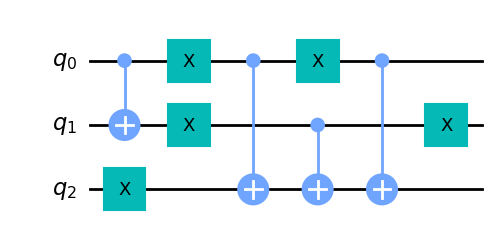

In [2]:
qreg_q = QuantumRegister(3, 'q')

circuit_1 = QuantumCircuit(qreg_q)
circuit_1.cx(qreg_q[0], qreg_q[1])
circuit_1.x(qreg_q[2])
circuit_1.x(qreg_q[0])
circuit_1.x(qreg_q[1])
circuit_1.cx(qreg_q[0], qreg_q[2])
circuit_1.cx(qreg_q[1], qreg_q[2])
circuit_1.x(qreg_q[0])
circuit_1.cx(qreg_q[0], qreg_q[2])
circuit_1.x(qreg_q[1])

circuit_dag_dep = circuit_to_dagdependency(circuit_1)

circuit_1.draw('mpl')

## SOTA Optimized

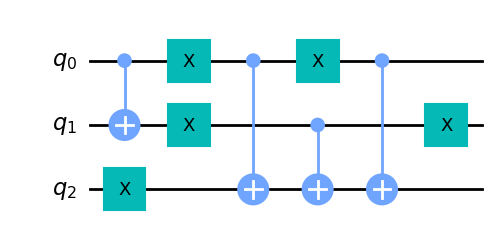

In [3]:
sota_opt_1 = transpile(circuits=circuit_1, optimization_level=3)
sota_opt_1.draw('mpl')

## Three Layer Optimized

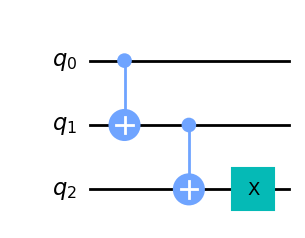

In [4]:
_pass = ThreeLayerOptimization()
_pass.run_dag_opt(circuit_to_dag(circuit_1))
circ_opt_1 = dag_to_circuit(_pass.dag_optimized)
circ_opt_1.draw('mpl')

# Circuit 2

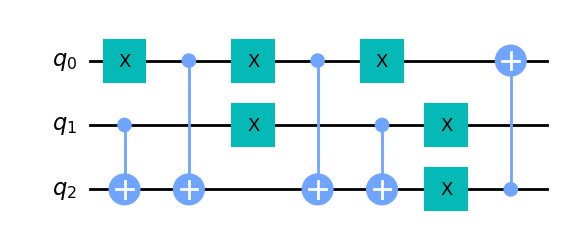

In [5]:
circuit_2 = QuantumCircuit(qreg_q)
circuit_2.x(qreg_q[0])
circuit_2.cx(qreg_q[1], qreg_q[2])
circuit_2.cx(qreg_q[0], qreg_q[2])
circuit_2.x(qreg_q[1])
circuit_2.x(qreg_q[0])
circuit_2.cx(qreg_q[0], qreg_q[2])
circuit_2.cx(qreg_q[1], qreg_q[2])
circuit_2.x(qreg_q[0])
circuit_2.x(qreg_q[1])
circuit_2.x(qreg_q[2])
circuit_2.cx(qreg_q[2], qreg_q[0])

circuit_2.draw('mpl')

## SOTA Optimized

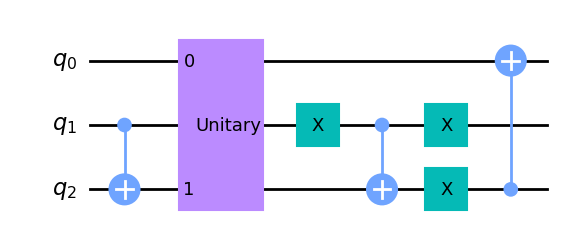

In [6]:
sota_opt_2 = transpile(circuits=circuit_2, optimization_level=3)
sota_opt_2.draw('mpl')

## Three Layer Optimized

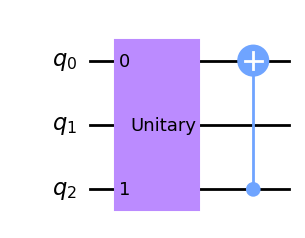

In [7]:
_pass = ThreeLayerOptimization()
_pass.run_dag_opt(circuit_to_dag(circuit_2))
circ_opt_2 = dag_to_circuit(_pass.dag_optimized)
circ_opt_2.draw('mpl')

## Comparison

In [8]:
circ_1_cost = _pass._quantum_cost(circuit_to_dagdependency(circuit_1))
sota_opt_1_cost = _pass._quantum_cost(circuit_to_dagdependency(sota_opt_1))
circ_opt_1_cost = _pass._quantum_cost(circuit_to_dagdependency(circ_opt_1))

circ_2_cost = _pass._quantum_cost(circuit_to_dagdependency(circuit_2))
sota_opt_2_cost = _pass._quantum_cost(circuit_to_dagdependency(sota_opt_2))
circ_opt_2_cost = _pass._quantum_cost(circuit_to_dagdependency(circ_opt_2))

# Display the variables
print(f"Circuit 1 original cost: {circ_1_cost}")
print(f"Circuit 1 SOTA cost: {sota_opt_1_cost}")
print(f"Circuit 1 TLO cost: {circ_opt_1_cost}")
print(f"Circuit 2 original cost: {circ_2_cost}")
print(f"Circuit 2 SOTA cost: {sota_opt_2_cost}")
print(f"Circuit 2 TLO cost: {circ_opt_2_cost}")

Circuit 1 original cost: 13
Circuit 1 SOTA cost: 13
Circuit 1 TLO cost: 5
Circuit 2 original cost: 16
Circuit 2 SOTA cost: 11
Circuit 2 TLO cost: 4
